In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub

CONTENT_DIR = 'img/content/'
STYLE_DIR = 'img/styles/'
OUTPUT_DIR = 'img/fast-nst/'

CONTENT_IMG_PATH = CONTENT_DIR + 'qc.jpg'
STYLE_IMG_PATH = STYLE_DIR + 'the-scream.jpg'

MAX_DIM = 512

In [17]:
def img_scaler(image, max_dim = MAX_DIM):
  original_shape = tf.cast(tf.shape(image)[:-1], tf.float32)
  scale_ratio = max_dim / max(original_shape)
  new_shape = tf.cast(original_shape * scale_ratio, tf.int32)
  return tf.image.resize(image, new_shape)

def load_img(path_to_img):
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img_scaler(img)
  return img[tf.newaxis, :]

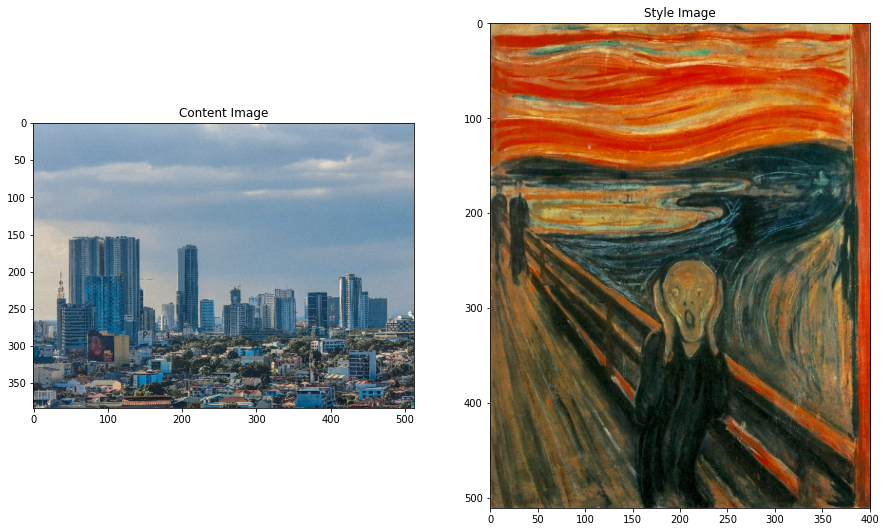

In [18]:
content = load_img(CONTENT_IMG_PATH)
style = load_img(STYLE_IMG_PATH)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(content[0])
plt.title('Content Image')

plt.subplot(1, 2, 2)
plt.imshow(style[0])
plt.title('Style Image')

plt.show()

In [13]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [19]:
output = hub_module(tf.constant(content), tf.constant(style))[0]

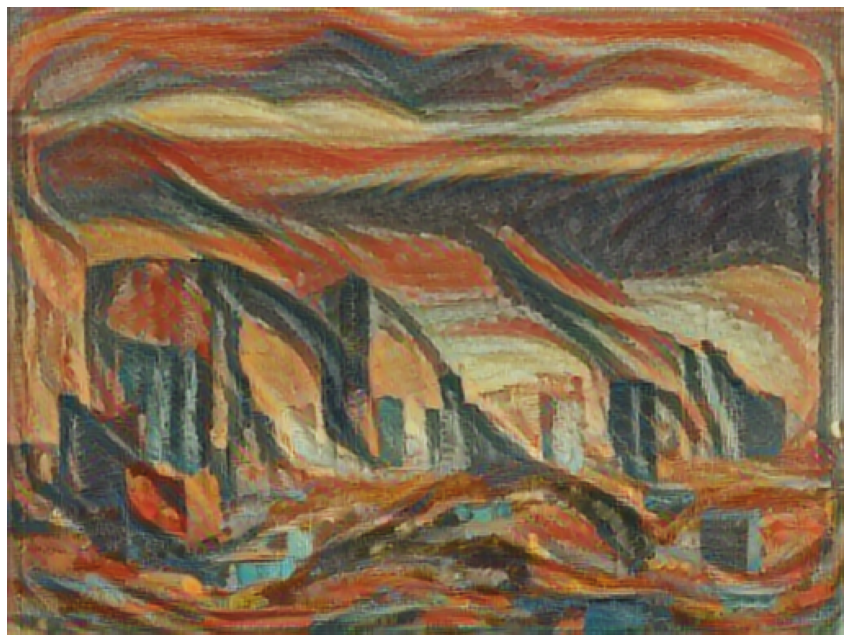

In [20]:
plt.figure(figsize=(15, 15))

plt.imshow(output[0])
plt.axis('off')

plt.savefig(OUTPUT_DIR + "fast-nst-qc_the-scream.png", dpi=150)
plt.show()